[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/Ex02-Pandas-and-EDA.ipynb) 


# ADAMS Tutorial #2: EDA using Pandas 
The second tutorial introduces you to two popular Python libraries for data handling and plotting. To that end, we will consider an EDA (explanatory data analysis) use case and work with an application credit scoring data set. The data, called the  "Home Equity" data set, is provided by www.creditriskanalytics.net. It provides information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationhsip with the lender. A binary target 'BAD' variable is also provided and indicates whether the borrower has repayed her/his debt. 

The overall outline of the notebook is as follows
1. Introducing the Pandas library 
2. Basic data pre-preparation
3. Explanatory data analysis

Before we get started, let's import the necessary libraries.
<br>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Some configuration of the plots we will create later.
%matplotlib inline  
plt.rcParams["figure.figsize"] = (20,10)

## 1.  Introducing the Pandas library
This tutorial uses the Home Equity (HMEQ) data set, which we can download from www.creditriskanalytics.net. We assume you have obtained the data and stored it somewhere on your hard disk. To load the data, you will need to specify the full path to your file. The easiest way for you would be to put the data into your working directory, which you can indentify as follows.

In [3]:
import os  # operating system interface 
print(os.getcwd())

C:\Users\Stefan Lessmann\OneDrive\Programming\adams\exercises\Ex02_eda_using_pandas


Once we know where to find the file, we can import the data into a Pandas data frame.

In [4]:
file = '../../data/hmeq.csv'
credit = pd.read_csv(file)

### A First Look at the Data

The Pandas data frame provides a ton of useful functions for data handling. We begin with showcasing some standard functions that one needs every time when working with data.

In [5]:
# Query some properties of the data
print('Dimensionality of the data is {}'.format(credit.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(credit.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(credit.size))

Dimensionality of the data is (5960, 13)
The data set has 5960 cases.
The total number of elements is 77480.


In [6]:
# Obtain a high-level overview
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
# Preview of the first n rows
credit.head(n=5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


With the previous functions, you have already got a first impression of the data. On the website of the data, we can also find some more information on the variables. Specifically, the data set consists of 5960 observations and 13 variables. 
The variables are defined as the following:

- BAD: 1=default; 0=non-default
- LOAN: amount of the loan request
- MORTDUE: amount due on existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio


A very useful function of the data frame is function *.describe()*, which provides us with a summary of the data.

In [8]:
# The argument include all ensures that non-numeric variables are also shown
credit.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [10]:
credit.BAD.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

## 2. Basic data pre-preparation
The data set exhibits some common characteristics. We have a mix of categorical and numeric variables and see many missing values in both the categorical and numeric variables. Let's proceed with some minimal preparation of the data. We will introduce some more Pandas functions on the way.
<br>
Remember that the function *.info()* reports the data type of columns. The categories are yet stored as instances of data type *object*.

In [ ]:
credit.info()

#### Altering data types
The data type of a column affects the amount of storage needed to store the data. Data type object is most general in terms of what it can store but also needs a lot of memory. Let's enhance data storage by setting suitable data types for the variables.  

In [ ]:
# Code categories properly 
credit['REASON'] = credit['REASON'].astype('category')
credit['JOB'] = credit['JOB'].astype('category')

# The target variable has only two states so that we can store it as a boolean
credit['BAD'] = credit['BAD'].astype('bool')

# For simplicity, we can also conver LOAN to a float so that all numeric variables are of type flot
credit['LOAN'] = credit['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float 32 to reduce memory consumption
num_vars = credit.select_dtypes(include=np.float64).columns
credit[num_vars] = credit[num_vars].astype(np.float32)

# Check memory consumption after the converstions
credit.info()

Well done, the converted data frame needs a lot less memory. Of course, we lost some precision by downcasting to float32. However, specially when you work with larger data sets changes like those above can be very helpful when working with personal computers.
<br>
Since we speak about efficiency, note that the function *.select_dtypes*, which we have used above may be slow when working with larger data. This is because it performs some copying of the data internally. Should you ever experience issues, consider using list comprehension to get a list of column names for indexing a data frame. 

In [141]:
import time
filter = ['float16', 'float32', 'float64']  # say we are interested in these data types 
start = time.time()
# Option 1
num_vars = credit.select_dtypes(include=filter).columns.tolist()
end = time.time()
t1 = end-start
print('That took {:f} sec'.format(t1))

That took 0.008137 sec


In [142]:
# Option 2 with list comprehension
start = time.time()
num_vars2 = [x for x in credit.columns if credit[x].dtype in filter]
end = time.time()
t2 = end-start
print('That took {:f} sec'.format(t2))

That took 0.000000 sec


In [ ]:
# and yes, the result is the same
print(num_vars)
print(num_vars2)

Should you be interested in some more information on memory efficiency, have a look at this post at [TowardDataScience.com](https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32). Likewise, list comprehension is used a lot in Python so make your peace with it. Here is a great way to visualizing the concept. I strongly recommend you to read the corresponding post by Parul Pandey.
<img src='https://miro.medium.com/max/1400/1*xUhlknsL6rR-s_DcVQK7kQ.png'>
Image source: [Parul Pandey (2019): Comprehending the ‘Comprehensions’ in Python](https://towardsdatascience.com/comprehending-the-concept-of-comprehensions-in-python-c9dafce5111)

#### Indexing and subset selection
The previous example also made use of indexing. You can index a data frame in several ways. We will only illustrate some more popular options. A web search for "pandas data frame indexing" will provide many additional insights if you are interested.

In [ ]:
# Accessing a single column by name
credit['BAD']
# Alternatively
credit.BAD

In [121]:
# R-style indexing of selected rows and columns
credit.loc[0:4, ["BAD", "LOAN"]]  # note how the last index is this time part of the result (c.f. numpy)

,BAD,LOAN
0,True,1100.0
1,True,1300.0
2,True,1500.0
3,True,1500.0
4,False,1700.0


In [ ]:
# Access columns by index
credit.iloc[0:4, 0]
credit.iloc[0:4, [0, 3, 5]]
credit.iloc[0:4, np.arange(4)]

It is also common practice to select rows based on comparisons.

In [ ]:
q = "NINQ>10"
tmp = credit.query(q)
print('Number of applicants with {} is {}.'.format(q, tmp.shape[0]))
tmp

In [ ]:
# Alternatively, we can also use the function .loc() for logical indexing
credit.loc[credit.BAD == 1, ['LOAN', 'JOB', 'YOJ']]

#### Missing values
We have seen before that the data contains many missing values. Before moving on, we should do something about those missing values. The function *.isnull()* helps with identifying the relevant items.

In [ ]:
# Boolean mask to access missings
credit.isnull()
# Note that the above is equivalent to
credit.isna()

In [ ]:
#count of missing values
credit.isnull().sum().sum()

In [ ]:
#quick visualization of the missing values in our data set
sns.heatmap(credit.isnull(), cbar=False);

Let's start with the two categorical variables. The heatmap suggests that REASON exhibits more missing values than JOB. We will treat them differently for the sake of illustration. Now that we start altering our data frame more seriously, it is a good idea to make a copy of the data so that we can easily go back to a previous state.

In [10]:
# copy data
df = credit.copy()

In [ ]:
# Variable REASON: we treat missing values as a new level.
# First we need to add a new level
df.REASON.cat.add_categories(['IsMissing'], inplace=True)
# Now we can do the replacement
df.REASON[df.REASON.isnull() ] = "IsMissing"
df.REASON.head()

In [ ]:
df.JOB.mode()[0]

In [ ]:
# Variable Job: we replace missing values with the mode
df.JOB.mode()
# Alternatively
df.JOB.value_counts()

In [ ]:
df.JOB[df.JOB.isnull() ] = df.JOB.mode()[0]
df.JOB.head()

In [ ]:
# Verify mising value replacement was successful
if df.REASON.isnull().any() == False and df.JOB.isnull().any() == False:
    print('well done!')
else:
    print('ups')

We have a lot of numeric columns. To keep things simple, we simply replace all missings with the column median. Clearly a crude approach but it nicely shows how we can process several columns at once using a loop. 

In [ ]:
for col in df.select_dtypes(include='float32').columns:
    if df[col].isna().sum() > 0:
        m = df[col].median()
        df[col].fillna(m, inplace=True)      

In [ ]:
# see if it worked, count again
df.isnull().sum().sum()

<br> <br>
## 3. Explanatory data analysis
Now that we are familiar with Pandas, we can explore some of the plotting capabilities in Python. To that end, we go through an EDA pipeline and try to improve our understanding of the data along the way.
<br>

### Univariat Distribution

#### Categorical Values


In this part, we will examine  our target variable 'BAD', as well as the two categorical variables 'REASON' and 'JOB' individually. Firstly, we will count how many observations belong to each category of a variable.

In [ ]:
df.select_dtypes(exclude='float32').apply(pd.Series.value_counts).fillna(0, downcast='infer')


Categories and the binary target in particular are also a useful to examine sub-groups. For example, we could calculate the mean of a/all numeric variables for good and bad borrowers using the *.groupby()* function as follows:

In [ ]:
df.groupby("BAD").mean()

<br> <br>
A different way to present this data is visually.

In [ ]:
#exlude float leaves us with the target variable and both categorical variables
for i, col in enumerate(credit.select_dtypes(exclude='float32').columns):
    plt.figure(i)
    sns.countplot(x=col, data=credit)

### Univariate Distribution of Numeric Variables

Now we can start by taking a closer look at the numeric variables and their distribution. The *hist()* function will provide important insight.


In [ ]:
# We create one histogram for each numeric variable and illustrate how to set the number of bins
df.select_dtypes(include='float32').hist(bins=20); 

We observe many variables to have a long tail. This is very common in real data. Outliers seem to be an issue in this data set. To get a clearer view on outliers let's create some boxplots.

In [ ]:
# Nice way to do it quickly
num_vars = df.select_dtypes(include="float32")
df.boxplot(column=list(num_vars));

In [ ]:
# but since scaling is an issue we need individualized plots
num_vars = df.select_dtypes(include="float32")
half = np.ceil(num_vars.shape[1] / 2).astype(int)  # for cosmetic reasons we split the plots into two rows
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);
num_vars.iloc[:, half:num_vars.shape[1]].plot(kind = 'box', subplots=True);

Ok, so outliers are indeed a problem. We will truncate them based on Tuckey's rule of thumb. This also allows us to demonetrate another important Pandas function: *.apply()*. As the same suggests,it allows us to apply a fuction, i.e. a function taking care of outlier truncation, to a set of columns in a data frame. In comparison to a loop, which facilitates the same type of operation, *.apply()* is typically more efficient and thus a function to have on your list.

In [ ]:
# we first need our function to handle outliers 
def outlier_truncation(x, factor=1.5):
    '''
    Identifies outlier values based on the inter-quartile range IQR. 
    Corresponding outliers are truncated and set to a value factor x IQR
    
        Parameters:
            x (Pandas Series): A data frame column to scan for outliers
            factor (float): An outlier is a value this many times the IQR above q3/below q1
            
        Returns:
            Adjusted variable in which outliers are truncated
    '''
    x_new = x.copy()
    
    # Calculate IQR
    IQR = x.quantile(0.75) - x.quantile(0.25) 
    
    # Define upper/lower bound
    upper = x.quantile(0.75) + factor*IQR
    lower = x.quantile(0.25) - factor*IQR
    
    # Truncation
    x_new[x < lower] = lower
    x_new[x > upper] = upper
    
    return x_new

In [ ]:
# That is maybe an overkill but need to be a bit careful which variables to process. Check the boxplots and you see why 
num_cols = [x for x in df.columns if df[x].dtype == 'float32' and x not in ['DEROG', 'DELINQ']]

# Process every selected column using apply
df[num_cols] = df[num_cols].apply(outlier_truncation, axis=0)
df.describe()

Note how the maximum values have changed. You can also re-run the above code to create the boxplots and convince yourself that we have mitigated the outlier problem. 

<br> 

## Discretization of Numeric Variables

As seen in the boxplots above, we are facing some issues with the distribution of "DEROG" and "DELINQ". We can try and fix this by using discretization. This is the process of converting a numeric variable into discrete categories. These specific variables show high value counts for the value 0, yet way less for the other values combined. It might be difficult for an algorithm to pick up on generalizable patterns, as there are only very few observations for the higher values of both variables.

In [13]:
df.DELINQ.value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

In [14]:
df.DEROG.value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

We will exemplify two different techniques that can be used in this case. For one variable we will create a dummy, indicating whether or not the value of the variable is 0. The other one we will group into three categories. As "DELINQ" shows fewer observations for the value 0, we will use this variable to divide into three groups: 0, 1 & >1.

In [15]:
df['DELINQcat'] = '1+' #set default value to +1 for new variable 
df.loc[(df['DELINQ'] == 1), 'DELINQcat'] = '1' # change this value to 1, if value of DELINQ is 1
df.loc[(df['DELINQ'] == 0), 'DELINQcat'] = '0'
df.DELINQcat.value_counts()

0     4179
1+    1127
1      654
Name: DELINQcat, dtype: int64

We will proceed similarly with the variable "DEROG". We will create a dummy variable where every observation has the value 1 (true) if their value for the "DEROG" variable was 0. Every other value will be assigned the value 0 (false).

In [16]:
df['DEROGzero'] = '0' #set default to 0
df.loc[(df['DEROG'] == 0), 'DEROGzero'] = '1' #change to 1 if value of "DEROG" is 0 
df.DEROGzero.value_counts()

1    4527
0    1433
Name: DEROGzero, dtype: int64

Another technique commonly used for discretization is the calculation of the Weight of Evidence (WOE) and the Information Value. If you are not familiar with this technique, follow this link: https://youtu.be/o9gLDKd0ZiY?t=2475.
It will give you a general idea of the computation of these values. We will exemplify this with the variable : #todo add variable
Whilst this is especially useful for categories with high values, we will include this as an example.


[INFO] creating woe binning ...
Binning on 5960 rows and 2 columns in 00:00:22


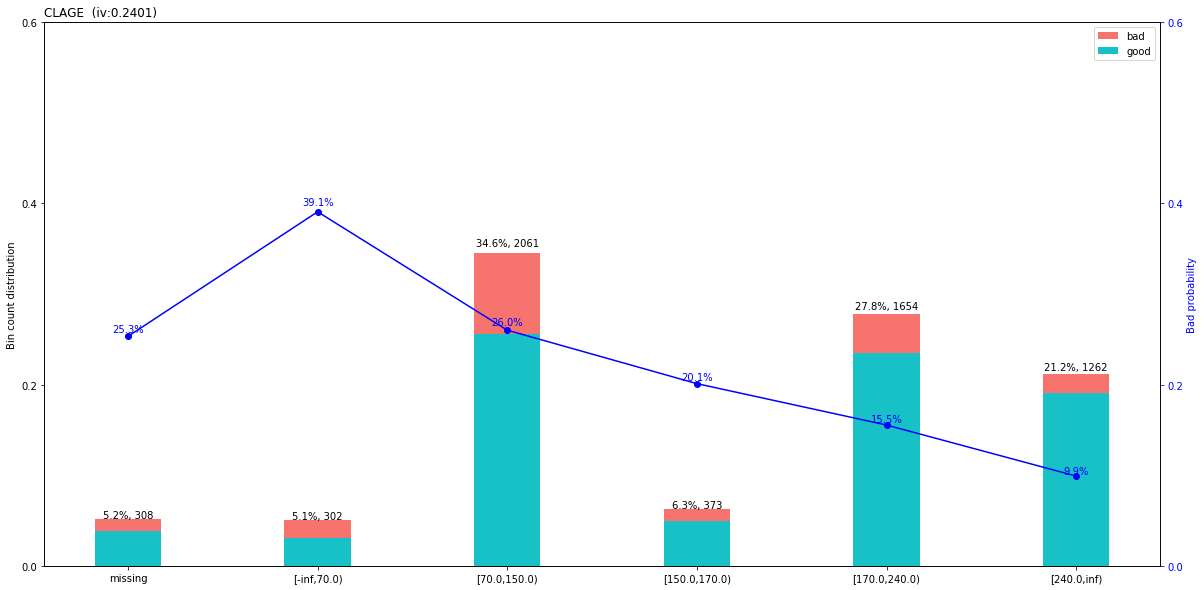

In [17]:
import scorecardpy as sc
temp = df[['CLAGE', 'BAD']] #select data to use, 'BAD' is needed to calculate the WOE
#todo edit variable 'CLAGE' to variable to use for WOE, no variable with high category count available

woe = sc.woebin(temp, y="BAD")
sc.woebin_plot(woe); #plotting the output

In [18]:
#df_woe = sc.woebin_ply(df, woe) 
# This would be the code to replace the original values of a variable with the WOE values. We will continue without using this variable.

<br> <br>

## Multivariate Analysis

After gaining more knowledge about the variables individually, it is important to examine their relationships more closely. In data science, this is a good way of identifying redundant information as well as variable interactions. 


#### Numeric Variables

Next, we will plot a heatmap. It shows the correlation for all numeric variables. 


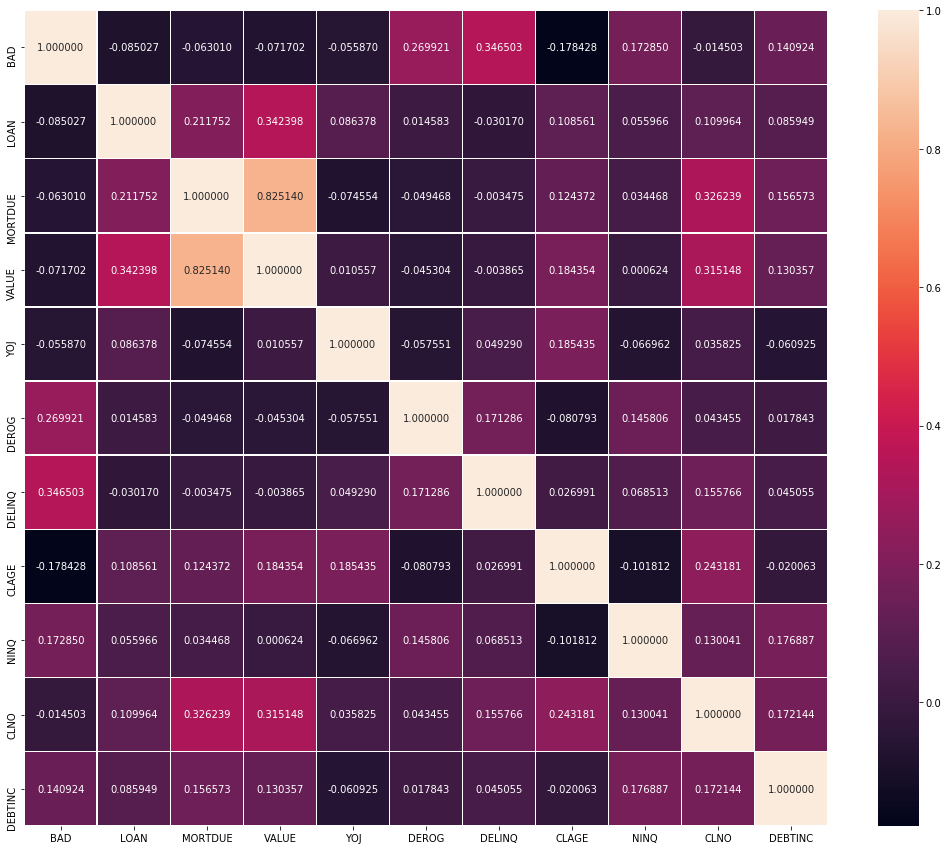

In [122]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');

 

 Due to the amount of variables it can be hard to filter the important variable relationships. We can solve this by filtering from a specific threshold. Following, we will set the threshold to 0.30.

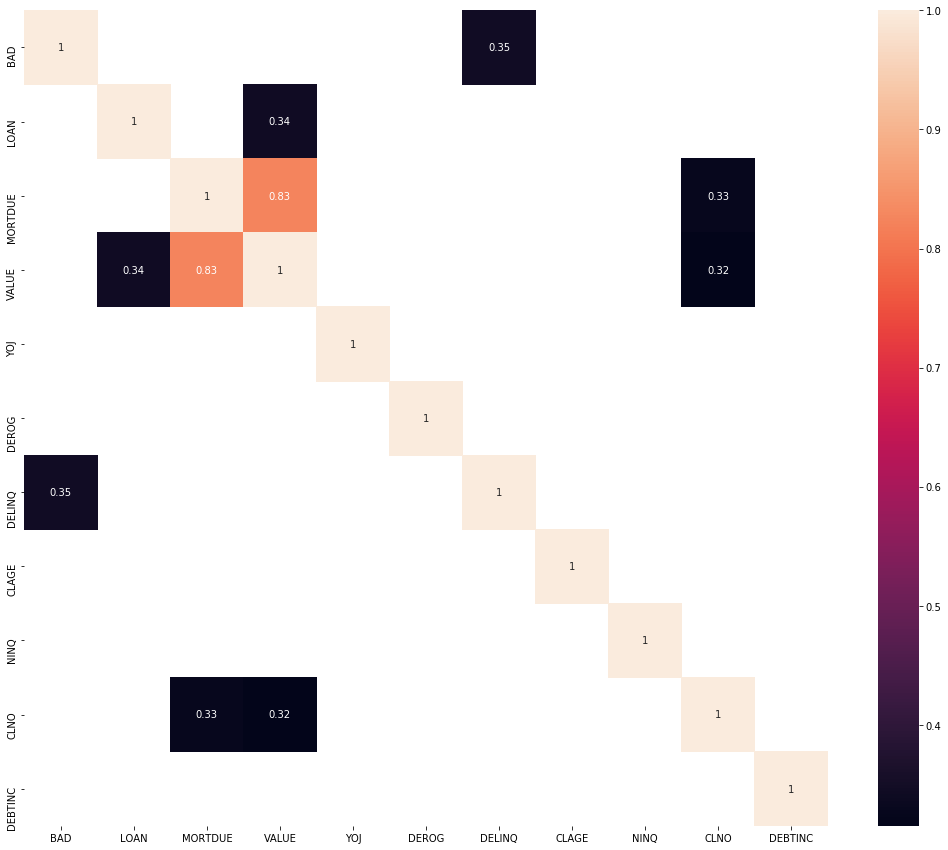

In [123]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

If you have trust in the threshold, the above chart makes variable selection easy.


### Multivariate Analysis of Categorical Variables

A common way to display categorical variables is the stacked count plot. Let us analyze the variabels 'REASON' and 'JOB' and how they are linked to the target variable.


In [128]:
df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
False,18444.603516,71601.304688,99798.804688,8.839027,0.116747,0.219032,185.173370,0.972123,21.061308,33.581154
True,16476.115234,66167.679688,91847.093750,7.866989,0.656013,1.154752,150.351913,1.539950,20.725821,35.680492


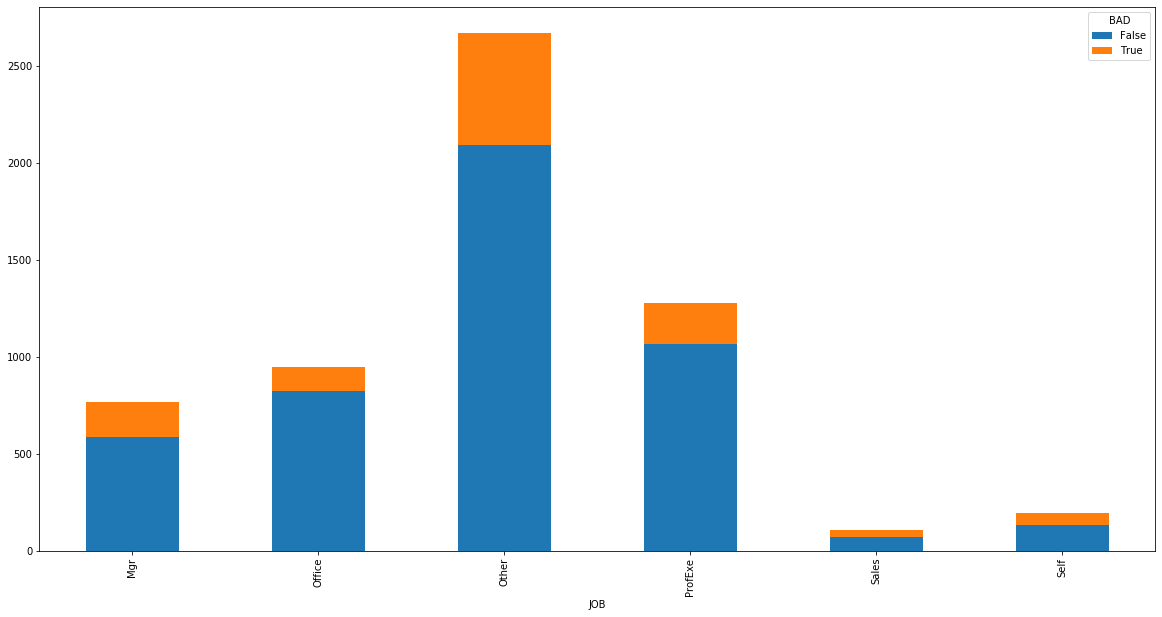

In [124]:
job = df.groupby(['BAD', 'JOB']).size().reset_index().pivot(columns='BAD', index='JOB', values=0)
                                                                       
job.plot(kind='bar', stacked=True);

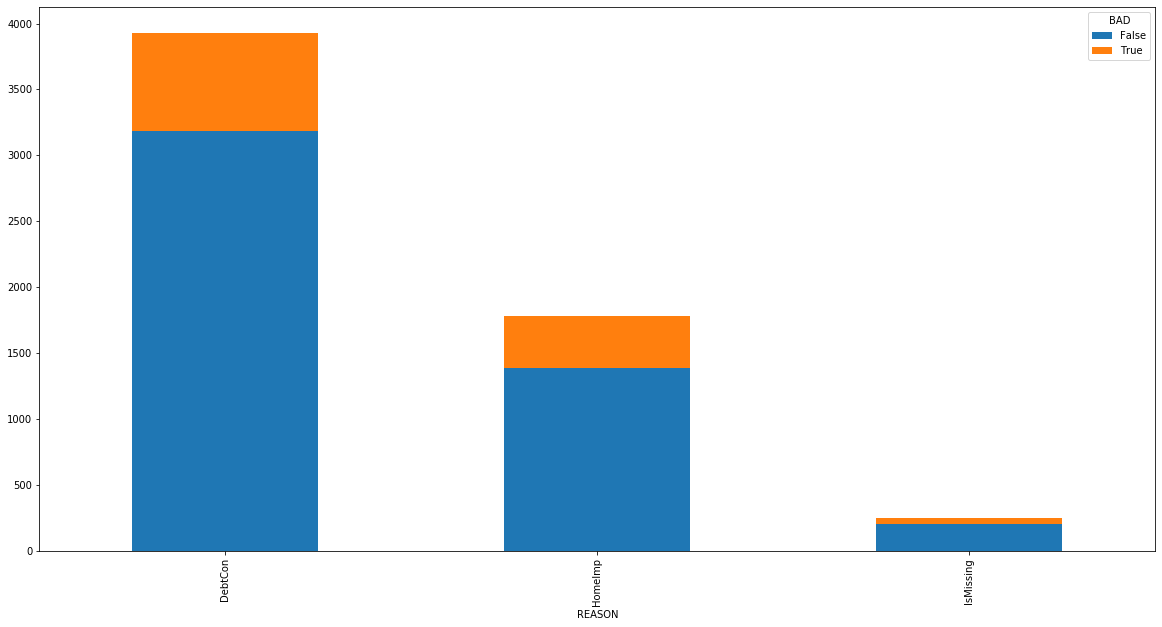

In [129]:
reason = df.groupby(['BAD', 'REASON']).size().reset_index().pivot(columns='BAD', index='REASON', values=0)
                                                                       
reason.plot(kind='bar', stacked=True); 

Are these displays useful in this case? What information can be drawn?
Which category in 'job' and 'reason' has defaulted more likely in the past?
What would be a better representation?


For this particular example, the stacked barplot has not given us more insight, we will plot a crosstab with percentages as its values instead of its total counts to allow better comparability.

In [132]:
# This way of doing the cross-tab using a lambda function is still widely spread over the internet
job = pd.crosstab(df.JOB, df.BAD).apply(lambda r: r/r.sum(), axis=1)
job

BAD,False,True
JOB,,
Mgr,0.766623,0.233377
Office,0.868143,0.131857
Other,0.783652,0.216348
ProfExe,0.833856,0.166144
Sales,0.651376,0.348624
Self,0.699482,0.300518


In [133]:
# But actually, you can make you life easier by studying the arguments that a function offers ;)
reason = pd.crosstab(df.REASON, df.BAD, normalize='index')
reason

BAD,False,True
REASON,,
DebtCon,0.810336,0.189664
HomeImp,0.777528,0.222472
IsMissing,0.809524,0.190476


Let's make these tables into a graph:


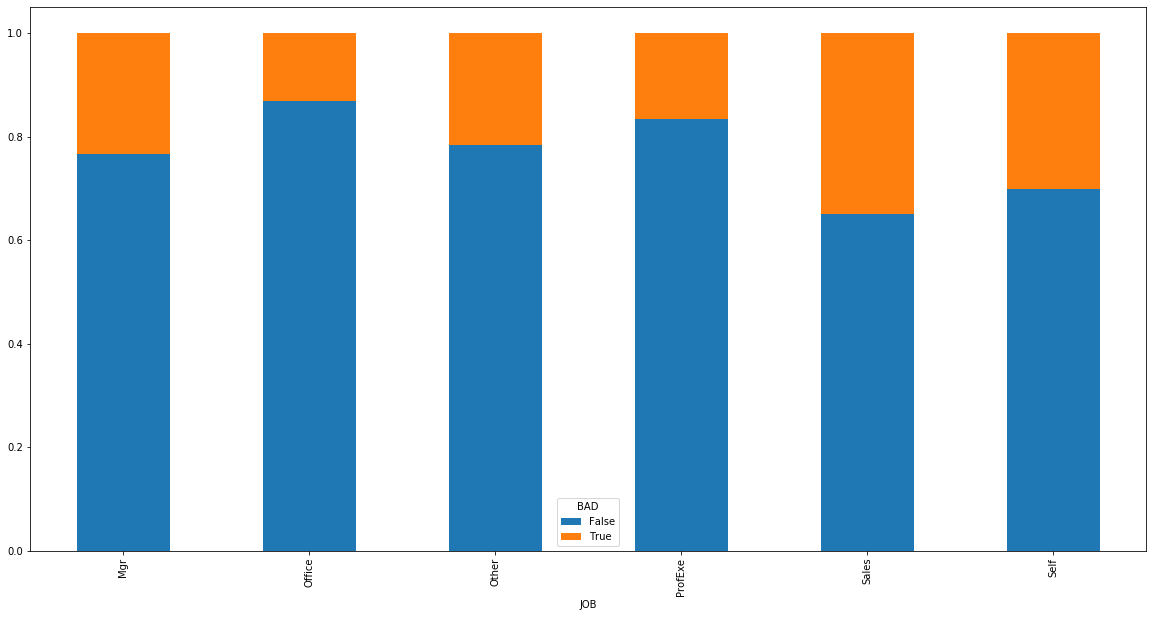

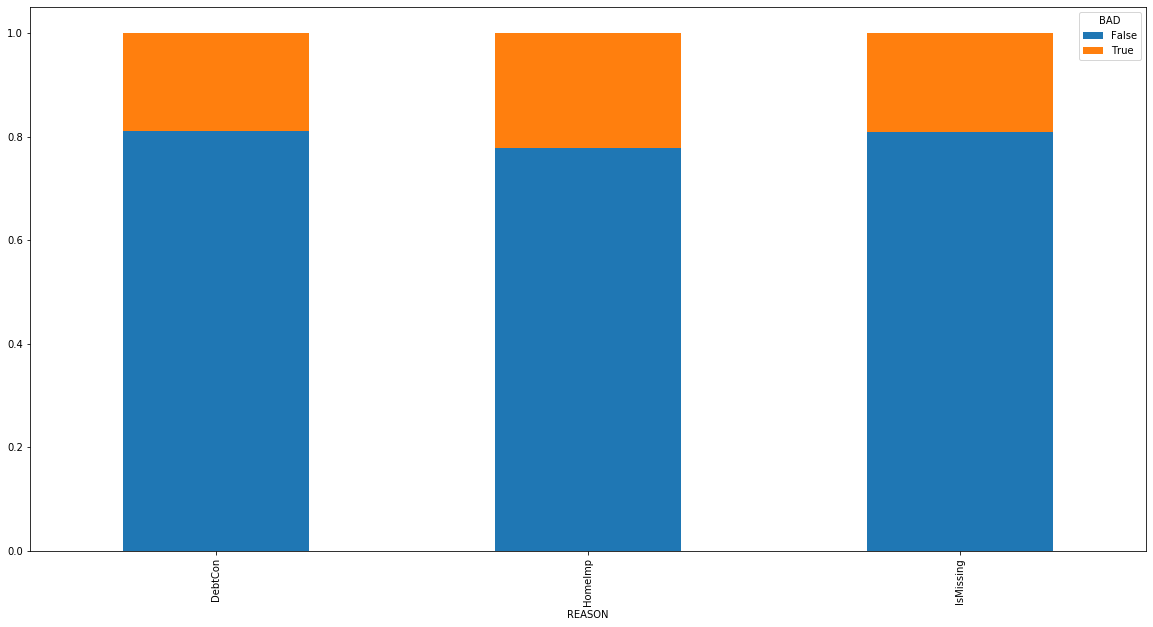

In [134]:
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
reason.div(reason.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);


Can you spot any important differences in these tables? Which display of the data do you find most adequate?
<br><br>

### Interactions Between Num. & Cat. Variables
Next, we can have a look at the distribution of our categories across the numerical variables. Violin plots are a great way to do so. The *seaborn* library makes creating these plots very easy. Below, we illustrate two options.


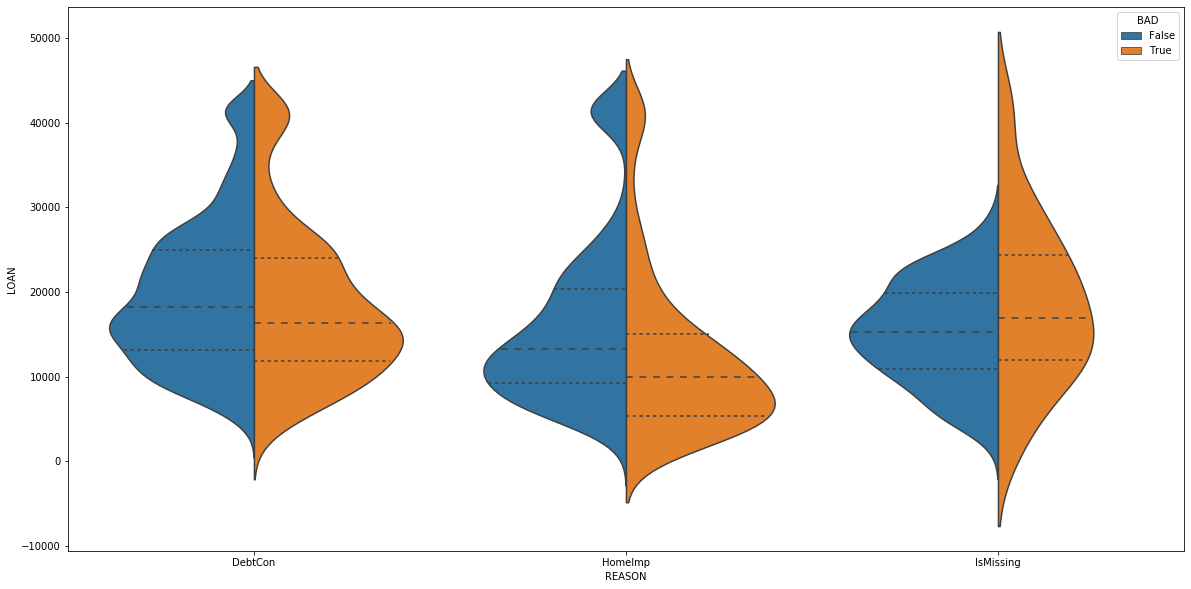

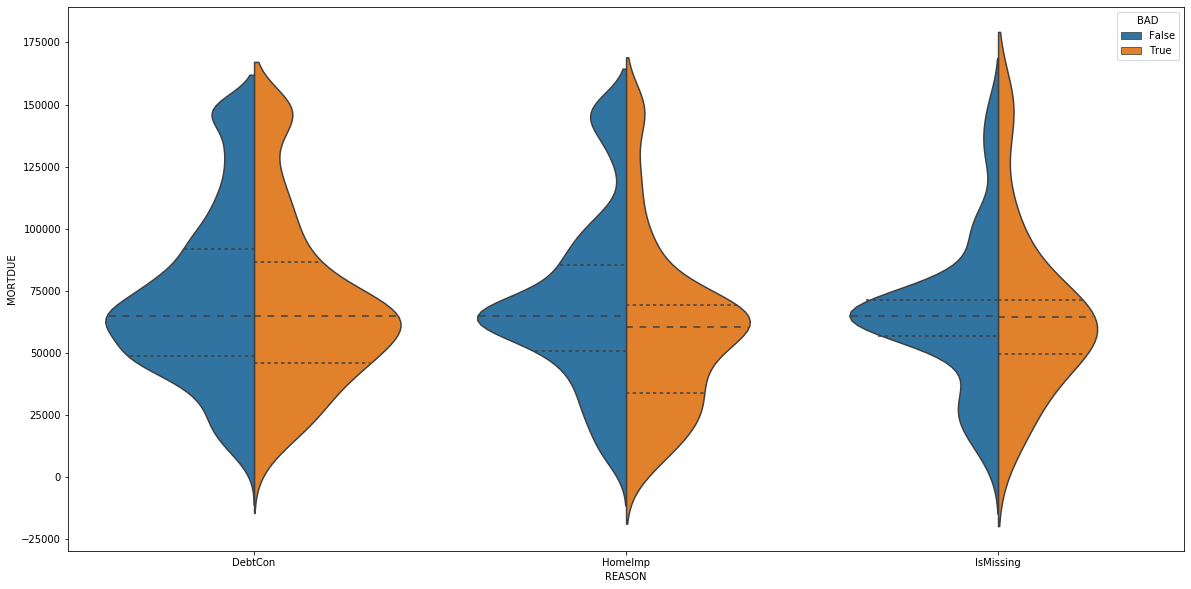

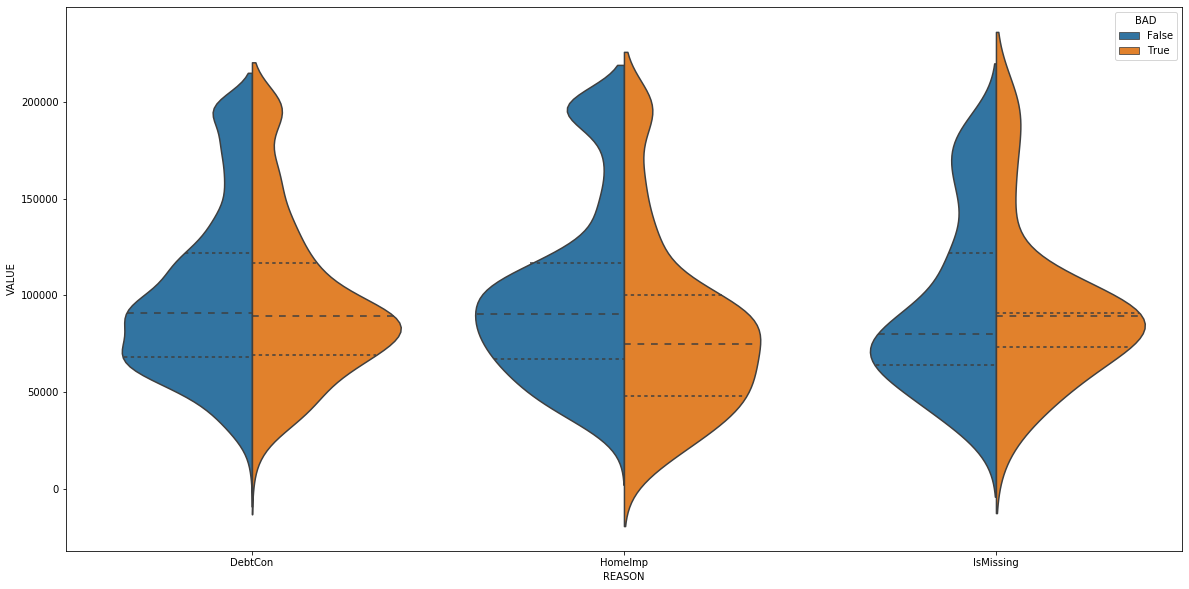

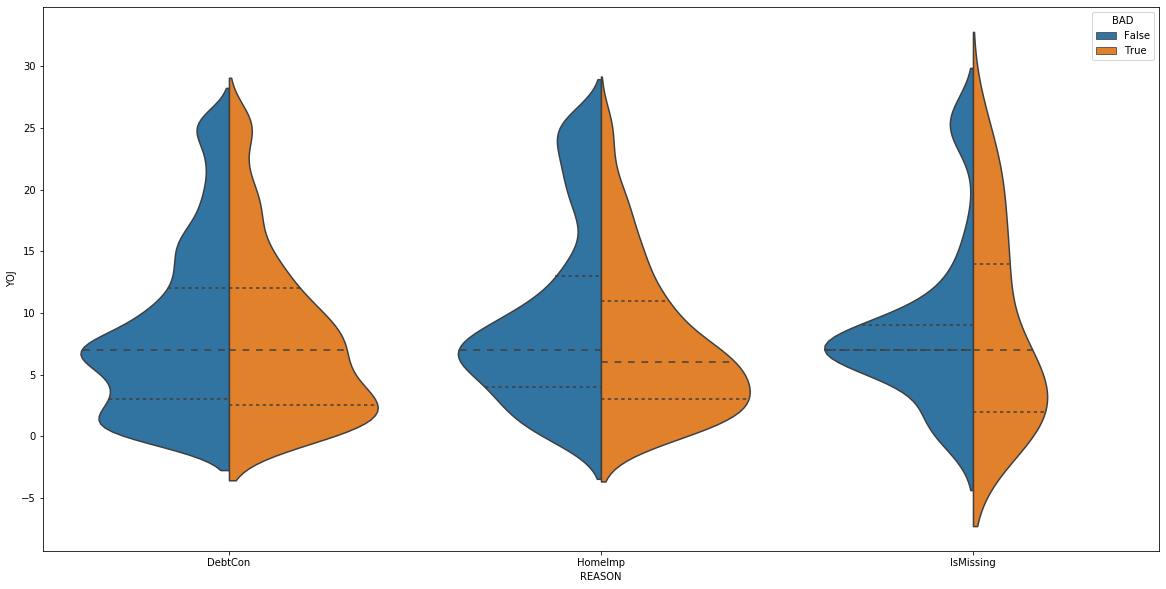

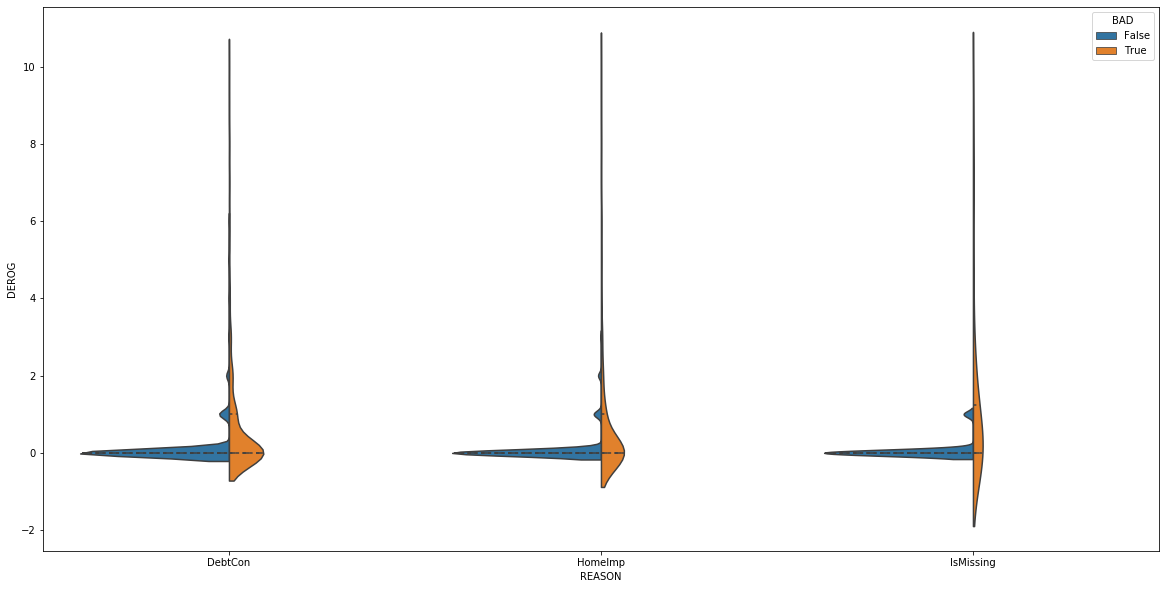

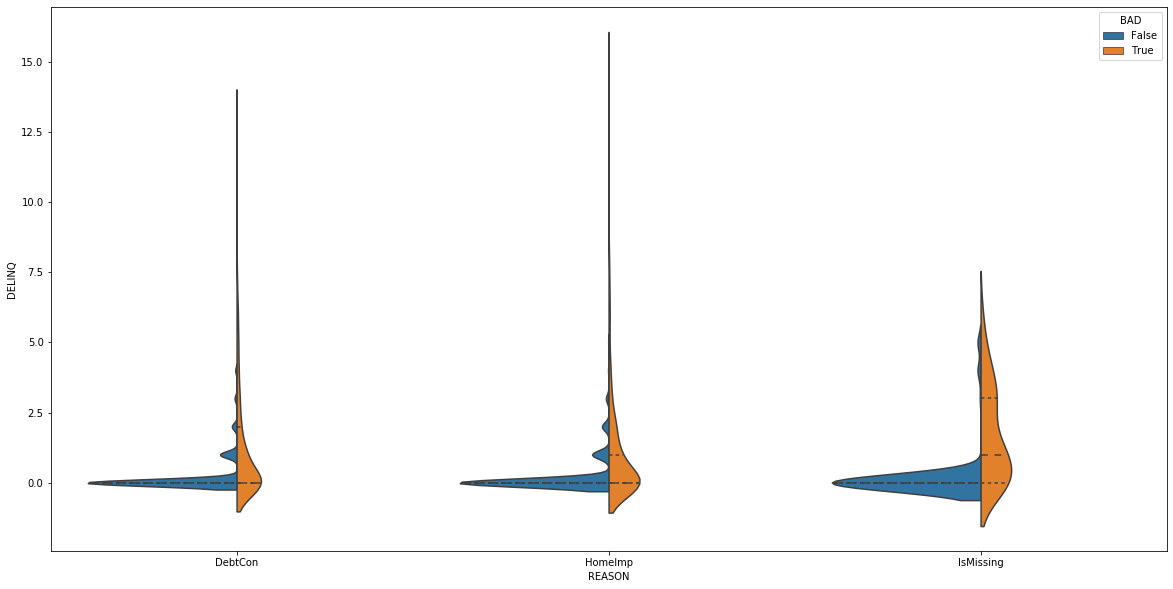

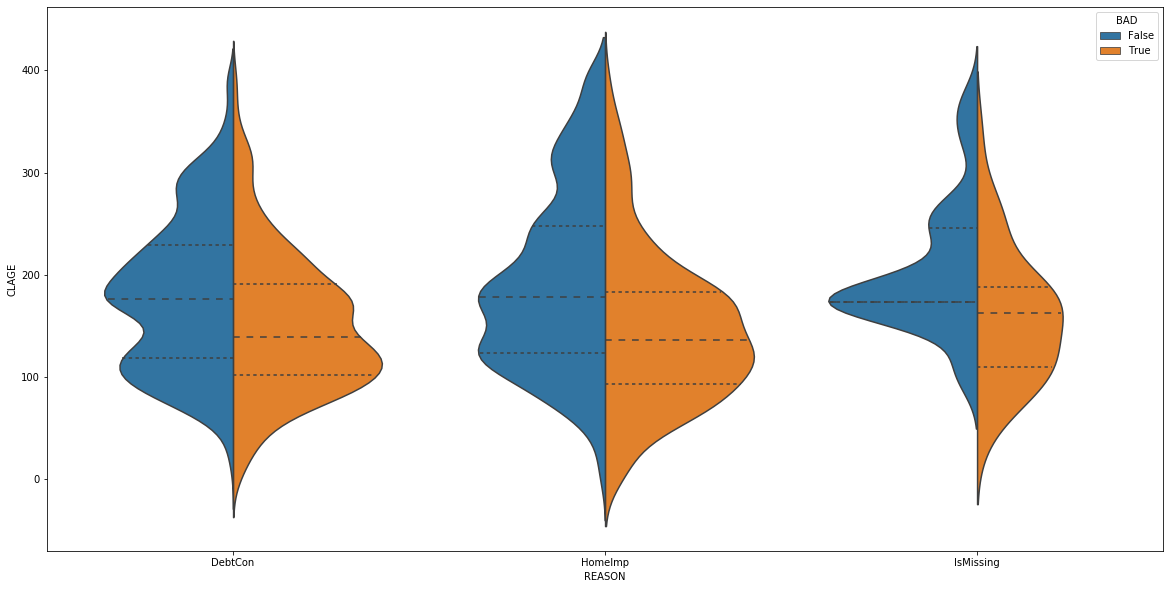

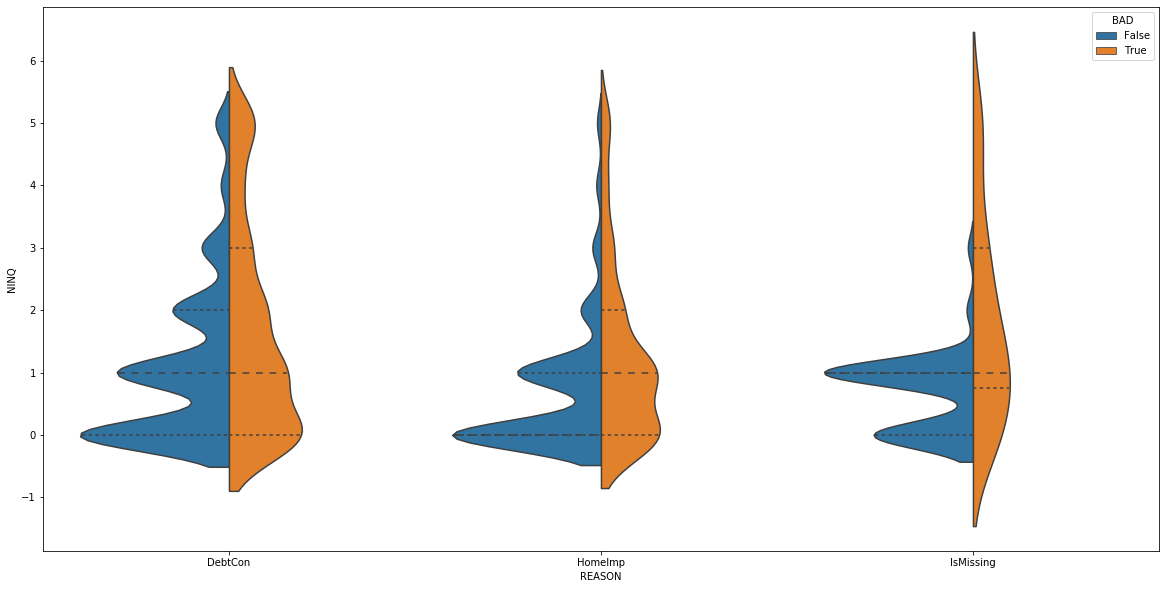

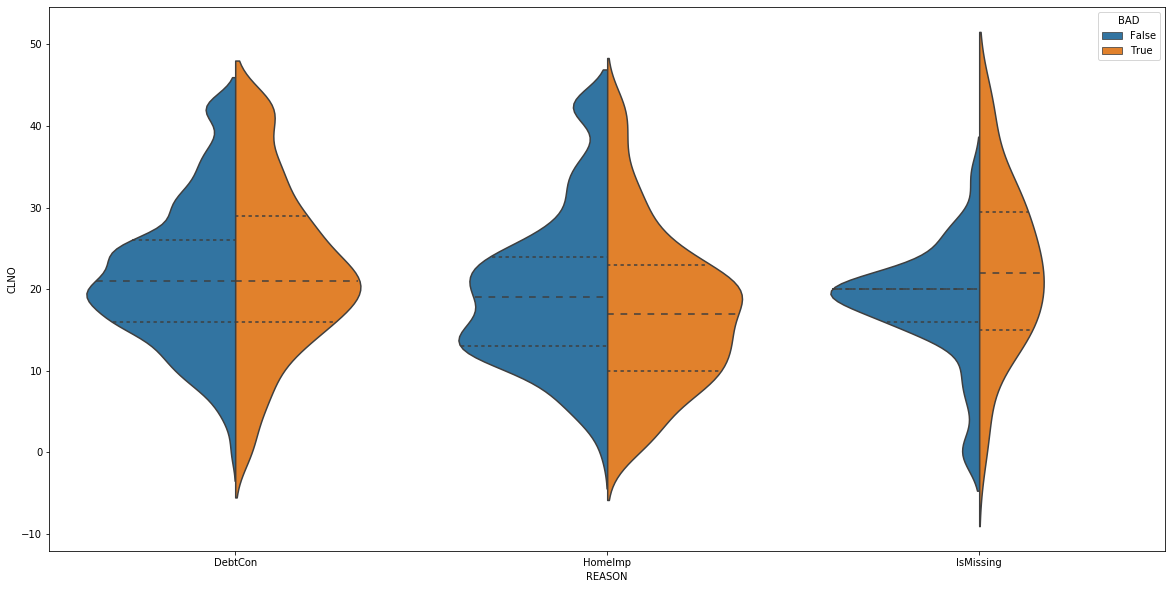

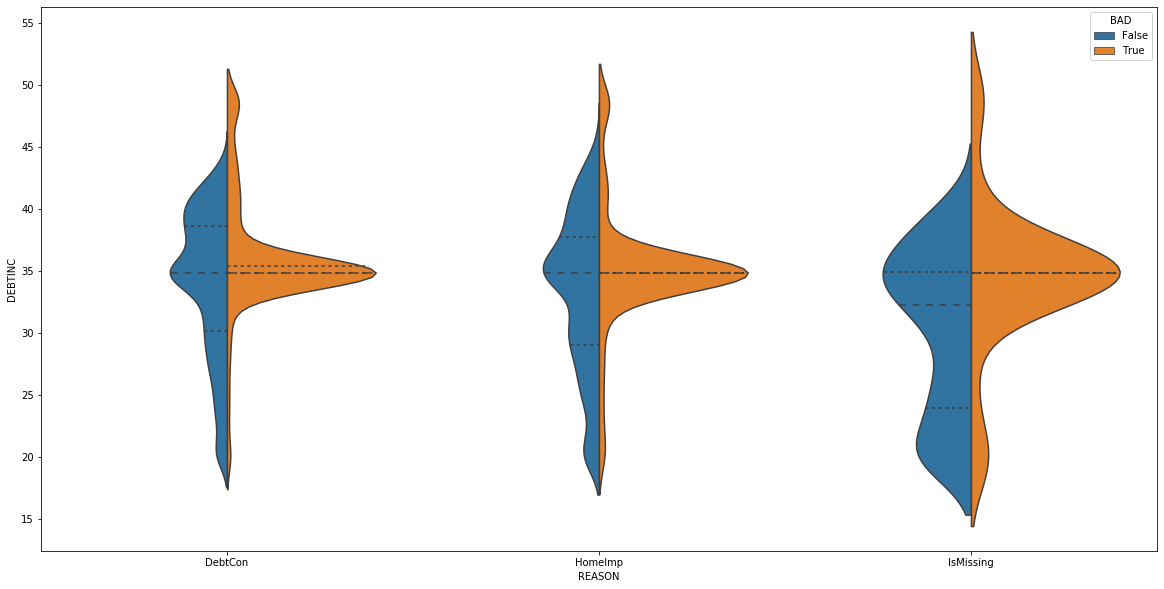

In [135]:
# We use the category 'REASON' and create one plot for each numeric variable
for col  in df.select_dtypes(include='float32').columns:
    plt.figure()
    sns.violinplot(x='REASON', y=col, hue='BAD',
                   split=True, inner="quart",
                   data= df, subplots=True)



What do you have to look for to identify the relevant information in this graph?
How do the reasons for the loan 'debt consolidation' and 'home improvement' differ? 
What can be said about the relationships to the numeric variables? 

Let's repeat this for the variable 'JOB' but using a different approach

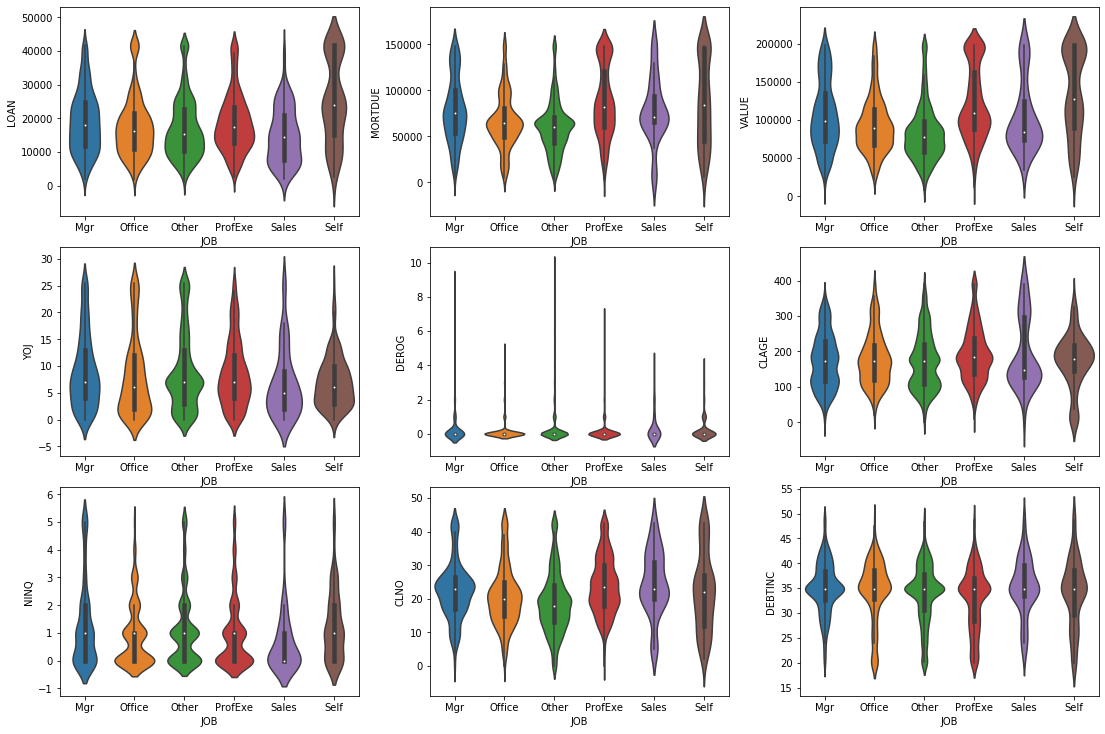

In [136]:
# Repeat for category JOB
fig, axs = plt.subplots(3,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  
x = df.JOB

sns.violinplot(x=x, y="LOAN",  data=df,ax=axs[0,0])
sns.violinplot(x=x, y="MORTDUE", data=df,ax=axs[0,1])
sns.violinplot(x=x, y="VALUE", data=df,ax=axs[0,2])
sns.violinplot(x=x, y="YOJ", data=df,ax=axs[1,0])
sns.violinplot(x=x, y="DEROG", data=df,ax=axs[1,1])
sns.violinplot(x=x, y="CLAGE", data=df,ax=axs[1,2])
sns.violinplot(x=x, y="NINQ", data=df,ax=axs[2,0])
sns.violinplot(x=x, y="CLNO", data=df,ax=axs[2,1])
sns.violinplot(x=x, y="DEBTINC", data=df,ax=axs[2,2]);

## More Plots

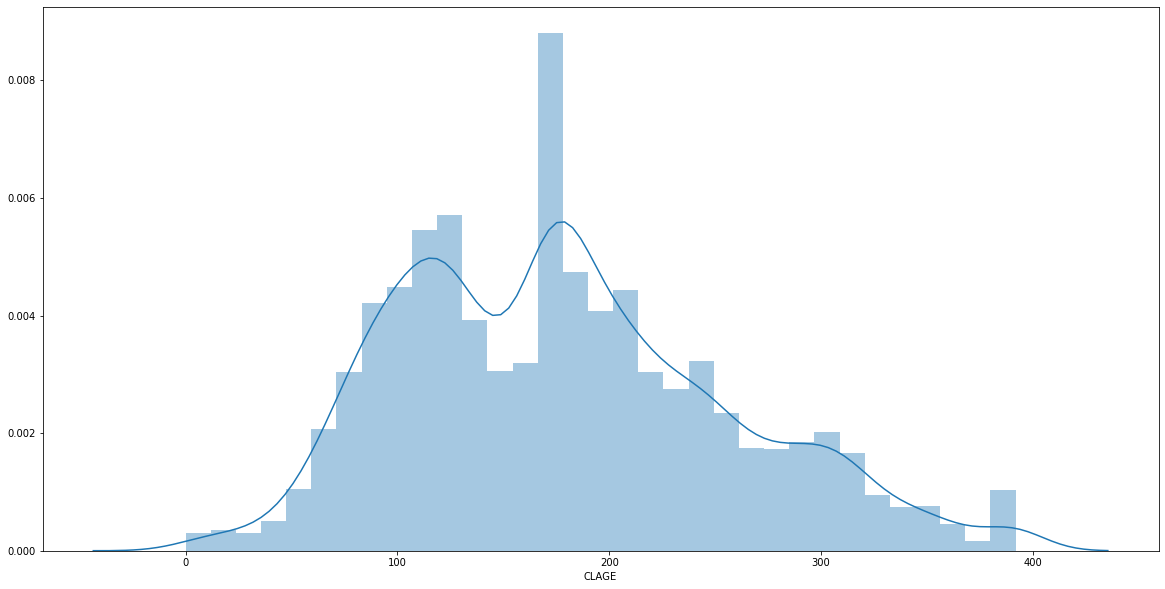

In [137]:
sns.distplot(df['CLAGE']);

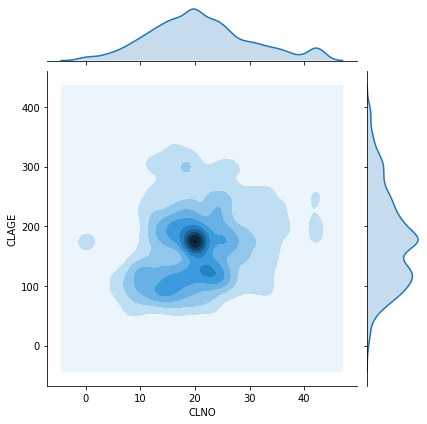

In [138]:
# These variables showed a correlation above 0.30. So we can examine their relationship further by doing the following:
sns.jointplot(x='CLNO',y='CLAGE',data=df, kind='kde');

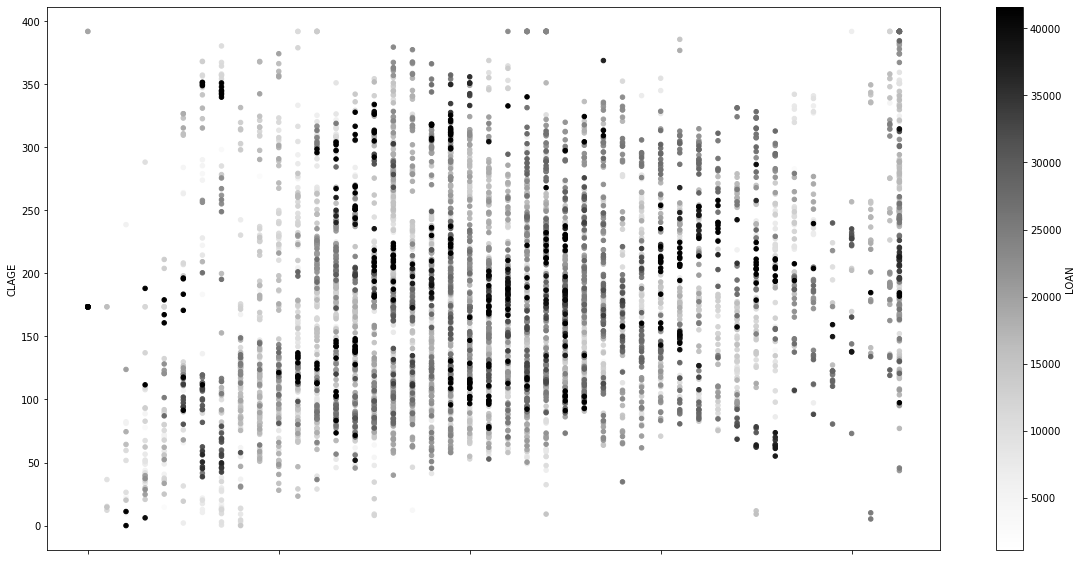

In [139]:
# We will stick with this example for comparability
df.plot.scatter(x='CLNO',y='CLAGE',c='LOAN');

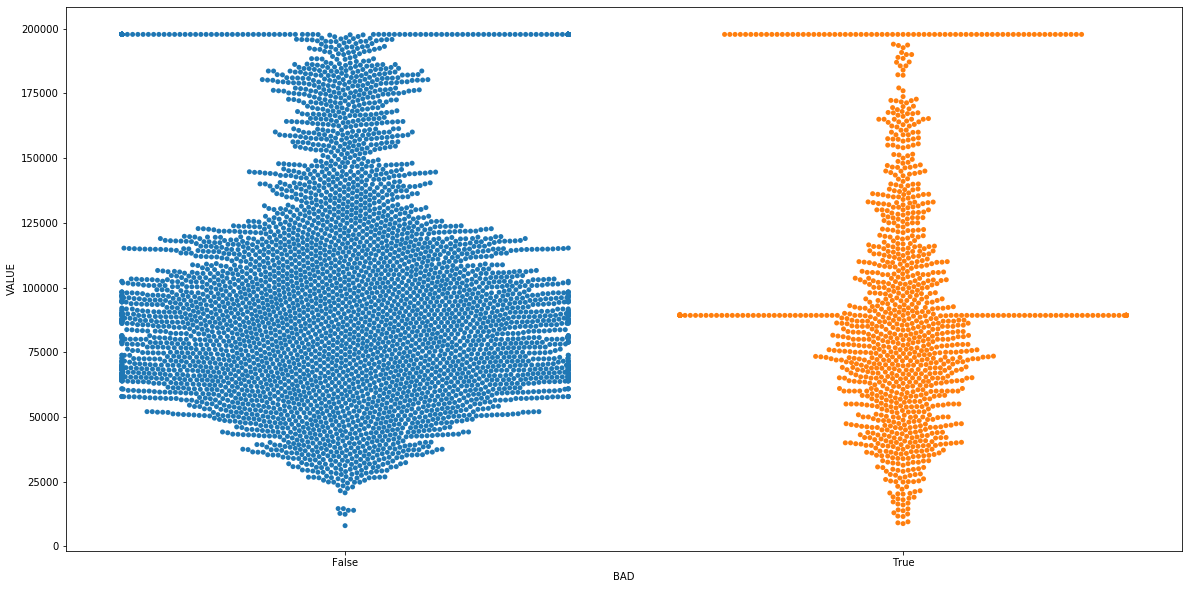

In [140]:
sns.swarmplot(df['BAD'], df['VALUE']);